In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import PIL
import PIL.Image
from collections import namedtuple
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image

## 画像の読み込み

In [2]:
#画像を読み込み
img = PIL.Image.open("sa-val.jpg")
#img = PIL.Image.open("color.jpg")

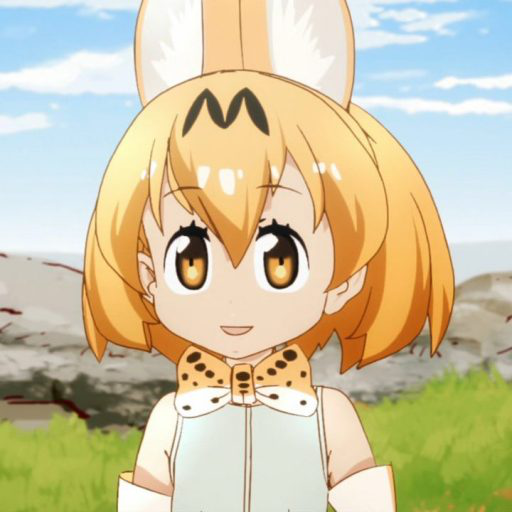

In [3]:
img

In [4]:
# 画像のサイズを取得
width, height = img.size

In [5]:
height, width

(512, 512)

In [6]:
# 特徴ベクトルを取得
# 色ベクトルと位置ベクトルを持った辞書を用意
v = []
color_dic = {}
for y in range(height):
    for x in range(width):
        r,g,b = img.getpixel((x,y))
        v.append(np.array([r,g,b]))
        try:# 辞書に登録されていれば
            pos_list = color_dic[(r,g,b)]
            pos_list.append((x,y))
            color_dic[(r,g,b)] = pos_list
        except:# 辞書に登録されていなければ
            color_dic[(r,g,b)] = [(x,y)]

In [7]:
v = np.array(v)

In [320]:
v

array([[225, 233, 246],
       [225, 233, 246],
       [225, 233, 246],
       ..., 
       [116, 142,  33],
       [116, 142,  33],
       [117, 143,  34]])

## 特徴空間をプロット

In [321]:
# 初期状態をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(v[:,0],v[:,1],v[:,2])

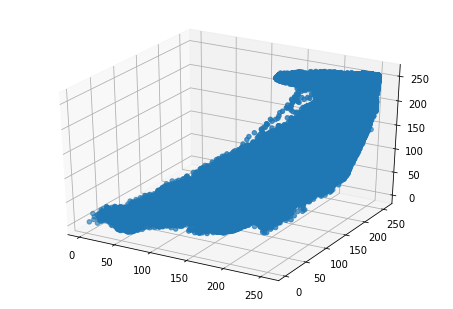

In [322]:
plt.show()

## クラスタリング

In [323]:
np.unique(v)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [324]:
len(np.unique(v))

256

In [325]:
# クラスタの個数
num_cluster = 300

### k-means法

In [326]:
# モデルの宣言
km = KMeans(n_clusters=num_cluster,#クラスタ数
            init='random',#セントロイドの初期値をランダムに選択
            n_init=10,#異なるセントロイドの初期値を用いたk-meansアルゴリズム
            max_iter=100,#k-meansアルゴリズムの内部イテレーション回数
            tol=1e-04,#収束と判定するための相対的な許容誤差
            random_state=0#セントロイドの初期値に用いる乱数生成器の状態
            )

In [327]:
# 学習
km.fit(v)#y_kmにクラスタの番号が保存される

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100,
    n_clusters=300, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [328]:
# 特徴ベクトル
v

array([[225, 233, 246],
       [225, 233, 246],
       [225, 233, 246],
       ..., 
       [116, 142,  33],
       [116, 142,  33],
       [117, 143,  34]])

In [329]:
# クラスタの番号
km.labels_

array([ 33,  33,  33, ..., 125, 125, 125], dtype=int32)

In [330]:
# クラスタの個数(=num_cluster)
np.unique(km.labels_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [331]:
# セントロイド
km.cluster_centers_

array([[ 122.40140845,  113.46197183,   91.71830986],
       [ 184.95526497,  178.40949759,  163.65932553],
       [ 207.76271186,  189.56610169,  168.74915254],
       [ 215.85253456,  234.15360983,  242.9093702 ],
       [ 230.91034483,  215.28045977,  193.42988506],
       [ 184.9       ,  190.69      ,  185.34      ],
       [ 189.78082192,  183.43462017,  169.91656289],
       [ 207.86455026,  200.2994709 ,  188.73650794],
       [ 115.85994398,   90.36134454,   62.27170868],
       [ 165.6768559 ,  118.86462882,   68.89737991],
       [ 218.71914894,  226.26524823,  229.87092199],
       [ 229.34129693,  243.68259386,  253.01365188],
       [ 251.27490542,  215.30075662,  153.12862547],
       [ 183.48979592,  187.05306122,   85.28571429],
       [ 241.9537037 ,  222.78935185,  186.33796296],
       [ 247.75      ,  240.05269608,  228.5502451 ],
       [ 252.49475691,  228.74737846,  158.93040991],
       [ 102.86620926,   94.84562607,   73.55403087],
       [ 239.94825175,  237.

## クラスタリング後の状態をプロット

In [332]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

In [333]:
def vec2color(color):
    r,g,b = color
    color = [hex(int(_))[2:] for _ in color]
    color = [_.zfill(2) for _ in color]
    return "#"+color[0]+color[1]+color[2]

In [334]:
# vec2colorの例
color = (27,2,113)
vec2color(color)

'#1b0271'

In [335]:
# グラフを作る
# 各ラベルに対して
for i in range(num_cluster):
    centroid = km.cluster_centers_[i]#各クラスタのcentroid
    tmp = []#各クラスタに属す特徴ベクトル
    # 特徴ベクトルの数だけ
    for j in range(len(v)):
        # ラベルが同じだったら
        if i==km.labels_[j]:
            tmp.append(v[j])
    tmp = np.array(tmp)
    ax.scatter(tmp[:,0],tmp[:,1],tmp[:,2],c=vec2color(centroid))

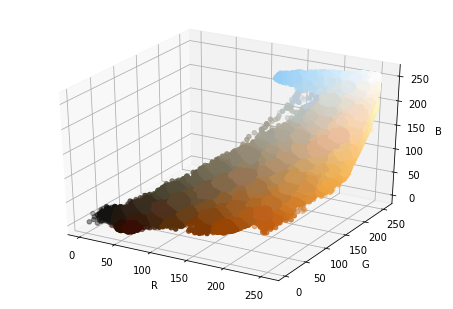

In [336]:
plt.show()

In [337]:
# グラフを保存
file_name = "img/glaph-{}.png".format(num_cluster)
plt.savefig(file_name)

## 画像変換

In [338]:
new_img = PIL.Image.new("RGB",(width,height))

In [339]:
for color,pos_list in color_dic.items():
    #その色がどのクラスタに属するか
    cluster_label = km.predict(np.array(color).reshape(1,-1)) # クラスラベルを取得
    centroid = km.cluster_centers_[cluster_label] # その色が属するクラスタのセントロイド
    centroid = tuple([int(n) for n in centroid[0]])
    for pos in pos_list:
        new_img.putpixel(pos,centroid)

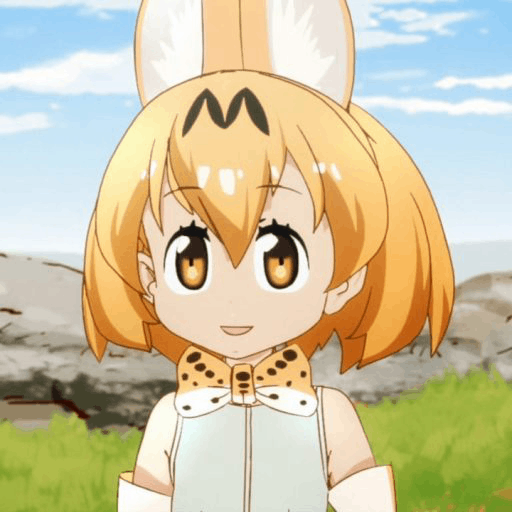

In [340]:
new_img

## 画像保存

In [341]:
new_img.save("./img/{}-means-img.jpg".format(num_cluster))